## Purpose

The purpose of thise notebook is to produce Figure 2 of the paper to show the differences in trips made During Ramadan (the lunar calendar month when most residents of Riyadh fast from food and water while the sun is up) 

First, import modules

In [47]:
import csv
import time
import datetime
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import pylab
import matplotlib
import warnings


Then import the Trips timestamps. In our case, a list of the days of each trip

In [48]:
with open('Riyadh_trips_timestamps.csv', 'rb') as input:
          dfR = pd.read_csv(input)

Filter for ramadan:

In [49]:
# change string to datetime values
dfR['day'] = pd.to_datetime(dfR['day'])
dfR['Pickup Time'] = pd.to_datetime(dfR['Pickup Time'])

pickupsAll = pd.DataFrame()

# Ramadan dates in 2015 and 2016 were acquired from www.when-is.com
ramadan15start = datetime.date(2015,6,18)
ramadan15end = datetime.date(2015,7,16)
ramadan16start = datetime.date(2016,6,7)
ramadan16end = datetime.date(2016,7,7)


pickupsRam = dfR[((dfR.day >= ramadan15start) & (dfR.day <= ramadan15end)) | ((dfR.day >= ramadan16start) & (dfR.day <= ramadan16end))][['Pickup Time']]
pickupsNRam = dfR[~ (((dfR.day >= ramadan15start) & (dfR.day <= ramadan15end)) | ((dfR.day >= ramadan16start) & (dfR.day <= ramadan16end)))][['Pickup Time']]
pickupsAll['Pickup Time'] = dfR['Pickup Time']

pickupsRam['weekday'] = pickupsRam['Pickup Time'].dt.dayofweek
pickupsRam['hour'] = pickupsRam['Pickup Time'].dt.hour
pickupsRam['day/hour'] = pickupsRam['weekday'] + pickupsRam['hour']/24
pickupsRam['day'] = pickupsRam['Pickup Time'].dt.date
    
pickupsNRam['weekday'] = pickupsNRam['Pickup Time'].dt.dayofweek
pickupsNRam['hour'] = pickupsNRam['Pickup Time'].dt.hour
pickupsNRam['day/hour'] = pickupsNRam['weekday'] + pickupsNRam['hour']/24
pickupsNRam['day'] = pickupsNRam['Pickup Time'].dt.date
    
pickupsAll['weekday'] = pickupsAll['Pickup Time'].dt.dayofweek
pickupsAll['hour'] = pickupsAll['Pickup Time'].dt.hour
pickupsAll['day/hour'] = pickupsAll['weekday'] + pickupsAll['hour']/24
pickupsAll['day'] = pickupsAll['Pickup Time'].dt.date

pickupsNRam = pickupsNRam.reset_index()
pickupsRam = pickupsRam.reset_index()
pickupsAll = pickupsAll.reset_index()


Compute pickup Hourly AVerages for Ramadan

In [50]:
pickupAvgcountRam = pd.DataFrame({'count' : pickupsRam.groupby(['weekday','hour']).size()}).reset_index()
weekdaycountRam = pd.DataFrame({'instance' : pickupsRam.groupby(['weekday', 'day']).size()}).reset_index().groupby('weekday').size()
for i in range(len(pickupAvgcountRam)):
    dayno = pickupAvgcountRam.iloc[i]['weekday']
    avgcount = pickupAvgcountRam.iloc[i]['count']/weekdaycountRam[dayno]
    pickupAvgcountRam.ix[i, 'count'] = avgcount

pickupAvgcountRam['day/hour'] = pickupAvgcountRam.weekday + pickupAvgcountRam.hour/24

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Compute pickup Houlry Averages for Non Ramadan

In [51]:
pickupAvgcountNRam = pd.DataFrame({'count' : pickupsNRam.groupby(['weekday','hour']).size()}).reset_index()
weekdaycountNRam = pd.DataFrame({'instance' : pickupsNRam.groupby(['weekday', 'day']).size()}).reset_index().groupby('weekday').size()
for i in range(len(pickupAvgcountNRam)):
    dayno = pickupAvgcountNRam.iloc[i]['weekday']
    avgcount = pickupAvgcountNRam.iloc[i]['count']/weekdaycountNRam[dayno]
    pickupAvgcountNRam.ix[i, 'count'] = avgcount
    
pickupAvgcountNRam['day/hour'] = pickupAvgcountNRam.weekday + pickupAvgcountNRam.hour/24

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Compute Pickup Hourly Averages for Combined Ramadan and Non Ramadan 

In [52]:
pickupAvgcountAll = pd.DataFrame({'count' : pickupsAll.groupby(['weekday','hour']).size()}).reset_index()
weekdaycountAll = pd.DataFrame({'instance' : pickupsAll.groupby(['weekday', 'day']).size()}).reset_index().groupby('weekday').size()
for i in range(len(pickupAvgcountAll)):
    dayno = pickupAvgcountAll.iloc[i]['weekday']
    avgcount = pickupAvgcountAll.iloc[i]['count']/weekdaycountAll[dayno]
    pickupAvgcountAll.ix[i, 'count'] = avgcount
    
pickupAvgcountAll['day/hour'] = pickupAvgcountAll.weekday + pickupAvgcountAll.hour/24


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Make the Plot

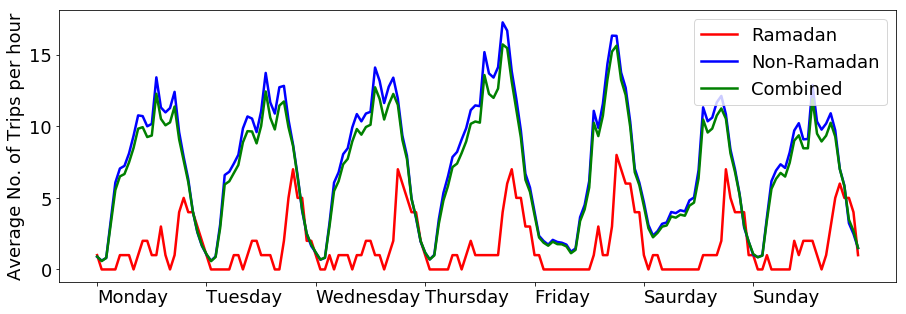

In [54]:
plt.clf
plt.close()
pylab.rcParams['figure.figsize'] = (15, 5) #makes figure size wider
frame4, ax = plt.subplots(1,1)

font = {'family' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
ax.plot(pickupAvgcountRam['day/hour'], pickupAvgcountRam['count'], 'r', label = 'Ramadan', linewidth=2.5)
ax.plot(pickupAvgcountNRam['day/hour'], pickupAvgcountNRam['count'], 'b', label = 'Non-Ramadan',linewidth=2.5)
ax.plot(pickupAvgcountAll['day/hour'], pickupAvgcountAll['count'],'g', label = 'Combined',linewidth=2.5)

plt.ylabel('Average No. of Trips per hour')


x = np.arange(0,7,1)
xtick_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saurday', 'Sunday']
ax.set_xticks(x)
ax.set_xticklabels(xtick_days, fontsize=18, ha = 'left')

ax.legend(loc= 'upper right')
# plt.show()
plt.savefig('Trips by hour with ticks.eps', bbox_inches = 'tight', dpi=300)
